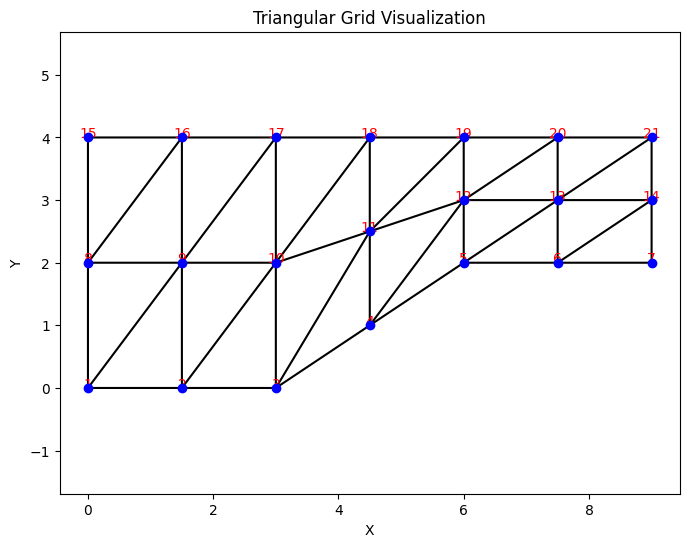

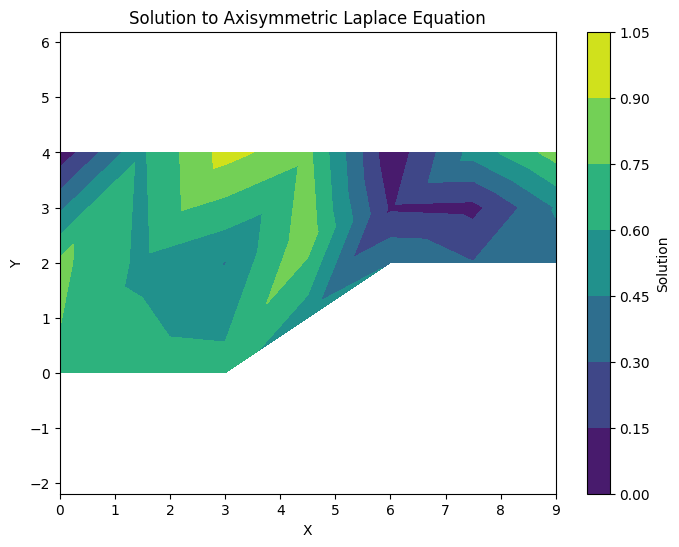

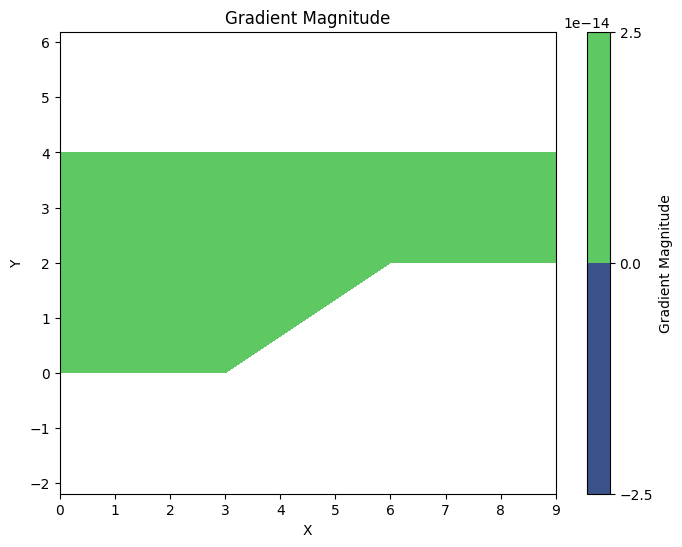

Node   X-Coord   Y-Coord   GradX   GradY   GradMag
--------------------------------------------------
1     0.000    0.000    0.000   0.000   0.000   
2     1.500    0.000    0.000   0.000   0.000   
3     3.000    0.000    0.000   0.000   0.000   
4     4.500    1.000    0.000   0.000   0.000   
5     6.000    2.000    0.000   0.000   0.000   
6     7.500    2.000    0.000   0.000   0.000   
7     9.000    2.000    0.000   0.000   0.000   
8     0.000    2.000    0.000   0.000   0.000   
9     1.500    2.000    0.000   0.000   0.000   
10    3.000    2.000    0.000   0.000   0.000   
11    4.500    2.500    0.000   0.000   0.000   
12    6.000    3.000    0.000   0.000   0.000   
13    7.500    3.000    0.000   0.000   0.000   
14    9.000    3.000    0.000   0.000   0.000   
15    0.000    4.000    0.000   0.000   0.000   
16    1.500    4.000    0.000   0.000   0.000   
17    3.000    4.000    0.000   0.000   0.000   
18    4.500    4.000    0.000   0.000   0.000   
19    6.000    4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.spatial import Delaunay
from scipy.linalg import solve

# Define points
points = np.array([
    [0.0, 0.0], [1.5, 0.0], [3.0, 0.0], [4.5, 1.0], [6.0, 2.0], [7.5, 2.0], [9.0, 2.0],
    [0.0, 2.0], [1.5, 2.0], [3.0, 2.0], [4.5, 2.5], [6.0, 3.0], [7.5, 3.0], [9.0, 3.0],
    [0.0, 4.0], [1.5, 4.0], [3.0, 4.0], [4.5, 4.0], [6.0, 4.0], [7.5, 4.0], [9.0, 4.0]
])

# Define triangles
triangles = np.array([
    [0, 1, 8], [0, 8, 7], [1, 2, 9], [1, 9, 8], [2, 3, 10], [2, 10, 9], [3, 4, 11],
    [3, 11, 10], [4, 5, 12], [4, 12, 11], [5, 6, 13], [5, 13, 12], [7, 8, 15], [7, 15, 14],
    [8, 9, 16], [8, 16, 15], [9, 10, 17], [9, 17, 16], [10, 11, 18], [10, 18, 17],
    [11, 12, 19], [11, 19, 18], [12, 13, 20], [12, 20, 19]
])

# Visualize the triangular grid
plt.figure(figsize=(8, 6))
triangulation = Triangulation(points[:, 0], points[:, 1], triangles)
plt.triplot(triangulation, 'k-')
plt.scatter(points[:, 0], points[:, 1], color='blue', zorder=5)
for i, (x, y) in enumerate(points):
    plt.text(x, y, str(i + 1), color="red", fontsize=10, ha="center")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangular Grid Visualization')
plt.axis('equal')
plt.show()

# PDE Solver Setup (Laplace Equation)
# Coefficient matrix (Laplacian) and boundary conditions
num_points = len(points)
stiffness_matrix = np.zeros((num_points, num_points))
rhs = np.zeros(num_points)

# Compute gradients for visualization
gradient_x = np.zeros(num_points)
gradient_y = np.zeros(num_points)

# Placeholder for Dirichlet BC and system assembly
boundary_conditions = {
    "lower": {"edges": [0, 1], "value": 0},
    "upper": {"edges": [5], "value": 4},
    "left": {"edges": [2], "value_function": lambda y: y},
    "right": {"edges": [6], "value_function": lambda y: 2 * (y - 2)},
}

# Add your Laplace equation solver logic here (e.g., FEM assembly)

# For now, visualize the grid
# Later, implement PDE solution using FEM or FDM

# Visualize results (placeholder values)
plt.figure(figsize=(8, 6))
plt.tricontourf(triangulation, np.random.rand(num_points))  # Placeholder: Replace with actual solution
plt.colorbar(label='Solution')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Solution to Axisymmetric Laplace Equation')
plt.axis('equal')
plt.show()

# Example: Compute and visualize gradient
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

plt.figure(figsize=(8, 6))
plt.tricontourf(triangulation, gradient_magnitude)
plt.colorbar(label='Gradient Magnitude')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Magnitude')
plt.axis('equal')
plt.show()

# Combine grid coordinates and gradients
coordinates_with_gradients = np.hstack([points, gradient_x[:, None], gradient_y[:, None], gradient_magnitude[:, None]])

# Print coordinates with gradients
print("Node   X-Coord   Y-Coord   GradX   GradY   GradMag")
print("--------------------------------------------------")
for i, row in enumerate(coordinates_with_gradients):
    print(f"{i + 1:<6}{row[0]:<9.3f}{row[1]:<9.3f}{row[2]:<8.3f}{row[3]:<8.3f}{row[4]:<8.3f}")

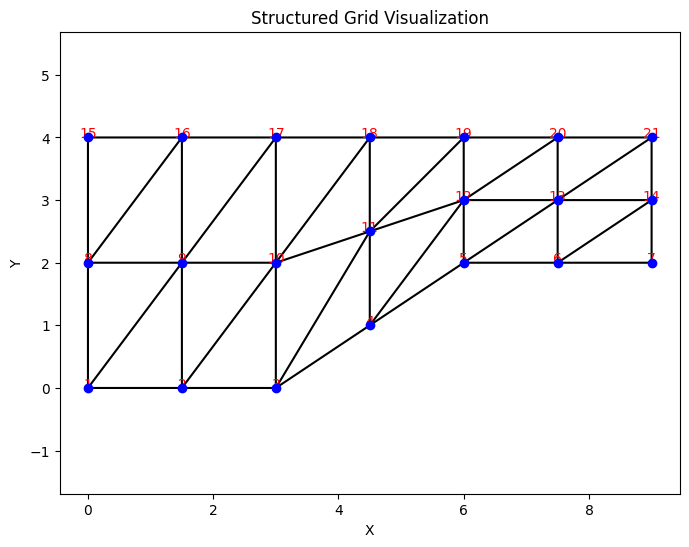

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

# Define points
points = np.array([
    [0.0, 0.0], [1.5, 0.0], [3.0, 0.0], [4.5, 1.0], [6.0, 2.0], [7.5, 2.0], [9.0, 2.0],
    [0.0, 2.0], [1.5, 2.0], [3.0, 2.0], [4.5, 2.5], [6.0, 3.0], [7.5, 3.0], [9.0, 3.0],
    [0.0, 4.0], [1.5, 4.0], [3.0, 4.0], [4.5, 4.0], [6.0, 4.0], [7.5, 4.0], [9.0, 4.0]
])

# Define triangles
triangles = np.array([
    [0, 1, 8], [0, 8, 7], [1, 2, 9], [1, 9, 8], [2, 3, 10], [2, 10, 9], [3, 4, 11],
    [3, 11, 10], [4, 5, 12], [4, 12, 11], [5, 6, 13], [5, 13, 12], [7, 8, 15], [7, 15, 14],
    [8, 9, 16], [8, 16, 15], [9, 10, 17], [9, 17, 16], [10, 11, 18], [10, 18, 17],
    [11, 12, 19], [11, 19, 18], [12, 13, 20], [12, 20, 19]
])

# Visualize the triangular grid
plt.figure(figsize=(8, 6))
triangulation = Triangulation(points[:, 0], points[:, 1], triangles)
plt.triplot(triangulation, 'k-')
plt.scatter(points[:, 0], points[:, 1], color='blue', zorder=5)
for i, (x, y) in enumerate(points):
    plt.text(x, y, str(i + 1), color="red", fontsize=10, ha="center")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Structured Grid Visualization')
plt.axis('equal')

# Save the plot as a vector file
plt.savefig("triangular_grid.pdf", format="pdf")  # Save as PDF
plt.savefig("triangular_grid.svg", format="svg")  # Save as SVG (optional)
plt.savefig("triangular_grid.eps", format="eps")  # Save as EPS (optional)
plt.show()